## 1. importing the required libraries


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
## load dataset

df = pd.read_csv('sleep_cycle_productivity.csv')
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


## 2. Dataset information

In [3]:
print("Information of the Dataset")
df.info()

print("Statistical information of the Dataset")
df.describe()

Information of the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score   

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


## 3. cleaning the Dataset

In [4]:
## checking dupicates

print(f"the no. of duplicate values are:  {df.duplicated().sum()}")

## there are no null values

print(df.isnull().sum())

the no. of duplicate values are:  0
Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


## 4. changing the datatype of date-time columns

In [5]:
## the "Sleep Start Time" and "Sleep End Time" column shows float datatype >> lets analyze them

print(df["Sleep Start Time"].head(5))
print(df["Sleep End Time"].head(5))

## we need to change them to real time cloumn

0    23.33
1    21.02
2    22.10
3    23.10
4    21.42
Name: Sleep Start Time, dtype: float64
0    4.61
1    2.43
2    3.45
3    6.65
4    4.17
Name: Sleep End Time, dtype: float64


In [6]:
## using python function to clean the column

def clean_time(time_value):
    time_str = str(time_value).strip()  # If there's no colon, assume it's only an hour value and add ":00"
    if ':' not in time_str:
        try:
            # Convert to integer to remove any decimals and then format as 2-digit hour.
            hour = int(float(time_str))
            time_str = f"{hour:02d}:00"
        except ValueError:
            # If conversion fails, return the original string
            pass
    return time_str

df['Sleep Start Time'] = df['Sleep Start Time'].apply(clean_time)
df['Sleep End Time'] = df['Sleep End Time'].apply(clean_time)

# Checking the cleaned values
print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())



0    23:00
1    21:00
2    22:00
3    23:00
4    21:00
Name: Sleep Start Time, dtype: object
0    04:00
1    02:00
2    03:00
3    06:00
4    04:00
Name: Sleep End Time, dtype: object


In [7]:
## also lets convets the date column into date time format

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                             datetime64[ns]
Person_ID                                 int64
Age                                       int64
Gender                                   object
Sleep Start Time                         object
Sleep End Time                           object
Total Sleep Hours                       float64
Sleep Quality                             int64
Exercise (mins/day)                       int64
Caffeine Intake (mg)                      int64
Screen Time Before Bed (mins)             int64
Work Hours (hrs/day)                    float64
Productivity Score                        int64
Mood Score                                int64
Stress Level                              int64
dtype: object

## 5. seperating numerical/ catagorical data

In [8]:
numerical_columns = pd.DataFrame(df , columns= ['Total Sleep Hours', 'Age', 'Exercise (mins/day)','Screen Time Before Bed (mins)', 'Work Hours (hrs/day)'] )
numerical_columns

,Total Sleep Hours,Age,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day)
0,5.28,32,86,116,8.808920
1,5.41,41,32,88,6.329833
2,5.35,20,17,59,8.506306
3,7.55,37,46,80,6.070240
4,6.75,46,61,94,11.374994
...,...,...,...,...,...
4995,5.37,38,55,96,9.384504
4996,7.91,55,70,177,5.016193
4997,4.80,44,21,139,11.788651
4998,8.40,55,15,161,7.093145


## 6. univariate analysis

In [9]:
numerical_columns.describe()

,Total Sleep Hours,Age,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.974902,38.590600,43.962600,91.421200,7.987873
std,1.454033,12.302799,25.798541,52.079123,2.275734
min,4.500000,18.000000,0.000000,0.000000,4.000067
25%,5.690000,28.000000,22.000000,46.000000,6.032720
50%,6.960000,39.000000,44.000000,92.000000,7.998295
75%,8.210000,49.000000,66.000000,136.000000,9.905024
max,9.500000,59.000000,89.000000,179.000000,11.999141


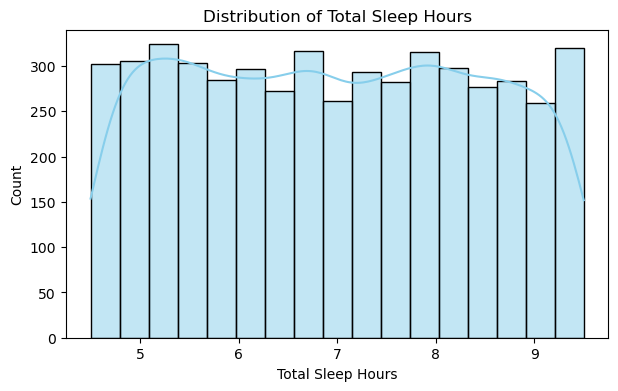

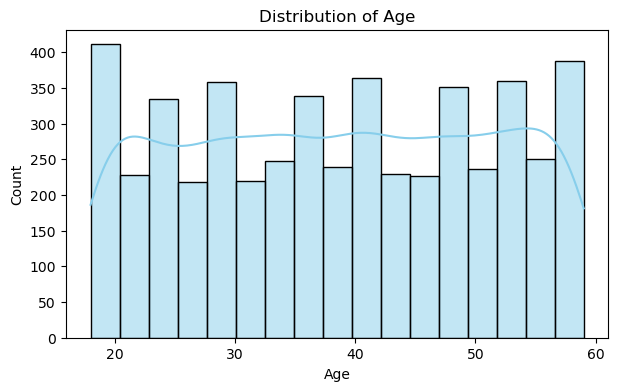

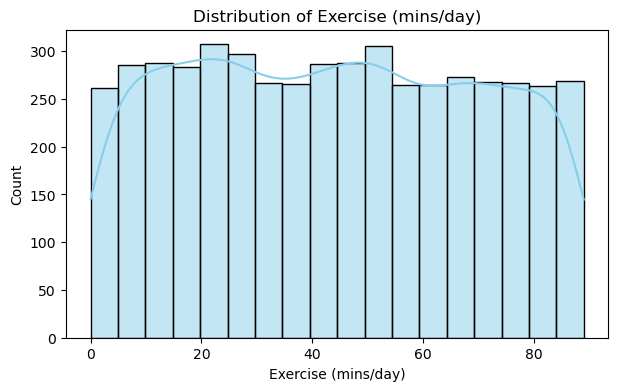

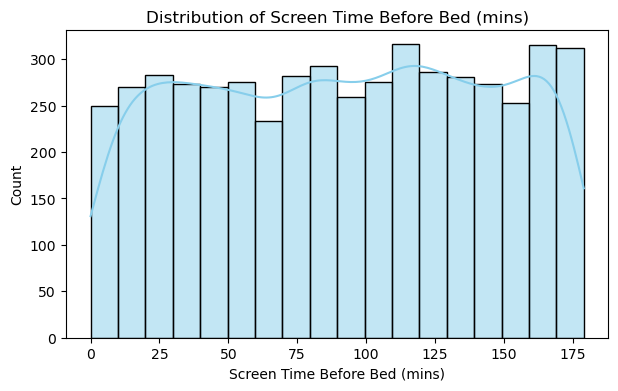

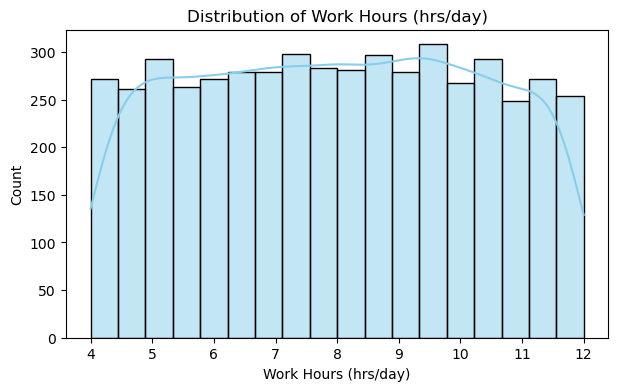

In [10]:
for col in numerical_columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

In [11]:
## Insights 
# >> there are no outliers present, no duplicated values, no null values , *the data is very clean

In [12]:
catagorical_columns = pd.DataFrame(df, columns = ['Gender','Sleep Quality','Productivity Score', 'Mood Score', 'Stress Level'] )
catagorical_columns

,Gender,Sleep Quality,Productivity Score,Mood Score,Stress Level
0,Other,3,8,3,6
1,Female,5,10,3,7
2,Male,7,10,9,10
3,Other,8,8,4,2
4,Other,10,8,7,9
...,...,...,...,...,...
4995,Female,1,5,2,1
4996,Male,4,5,6,2
4997,Female,6,2,7,1
4998,Other,9,8,1,6


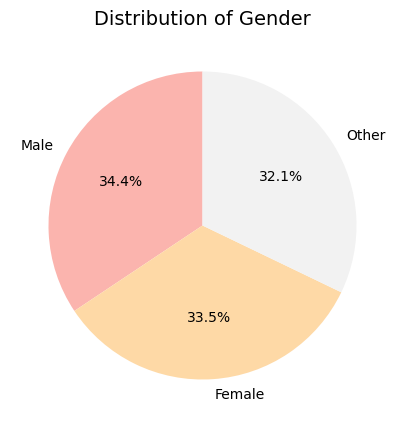

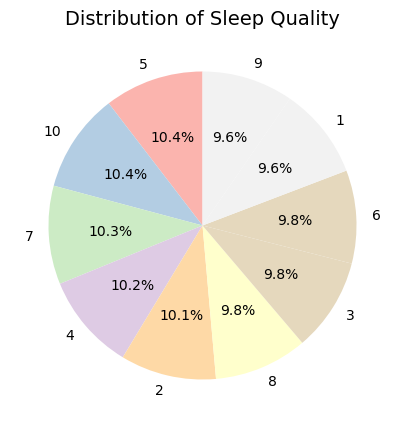

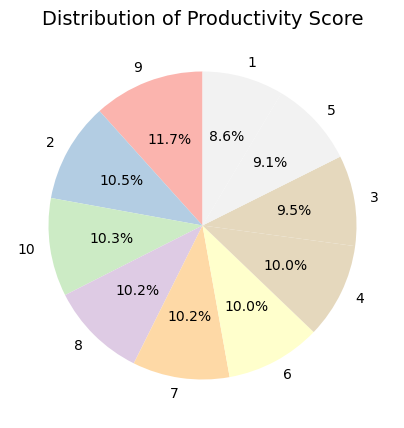

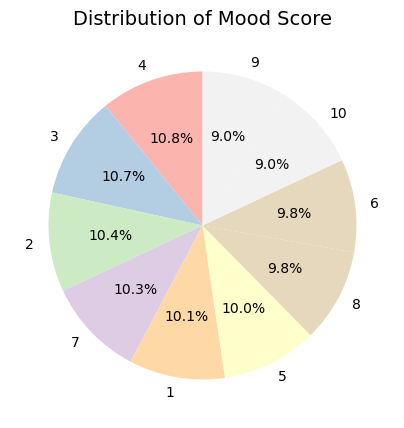

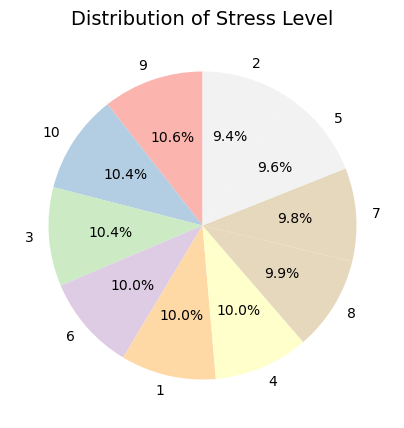

In [13]:
for col in catagorical_columns:
    plt.figure(figsize=(5,5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('')  # Remove the y-label for neatness
    plt.show()

In [14]:
## insights 
## >>  as we know that our data is not actually normally distributed,  and thus the productivity score , sleep quality, mood score , gender, and stress levels are quite symmetric, (eg: the percentage of each catagory is almost same)

## 7. bivariate analysis 

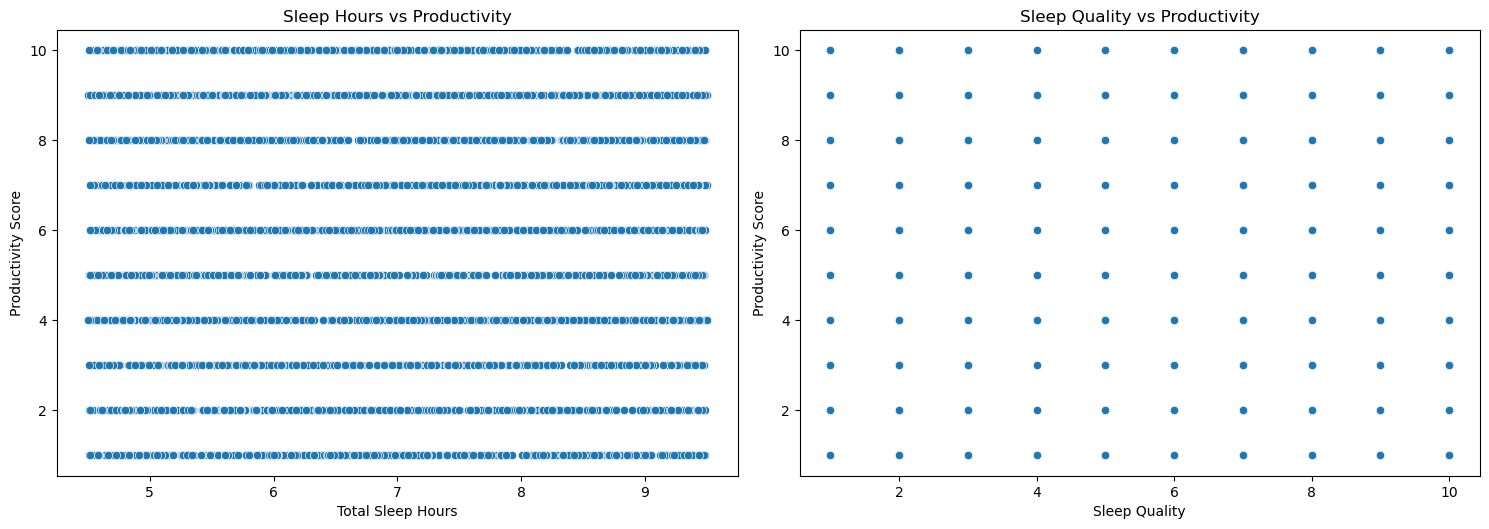

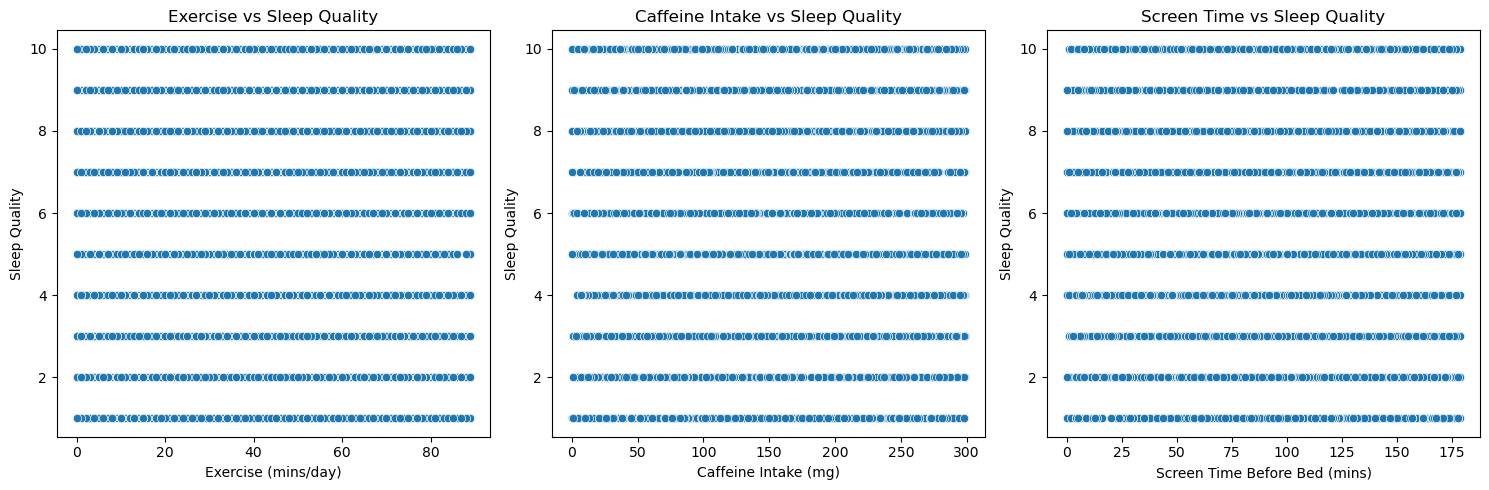

Visualization : The scatter plot of sleep hours vs productivity shows a uniform distribution of data points
Visualization : The scatter plot of sleep Quality vs productivity shows a uniform distribution of data points
Visualization : The scatter plot of exercise vs sleep quality shows a uniform distribution of data points
Visualization : The scatter plot of caffine intake vs sleep quality shows a uniform distribution of data points
Visualization : The scatter plot of screen time vs sleep quality shows a uniform distribution of data points


In [15]:
# Set up the visualization layout
plt.figure(figsize=(15, 10))

# Plot 1: Sleep Hours vs Productivity
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Total Sleep Hours', y='Productivity Score')
plt.title('Sleep Hours vs Productivity')

# Plot 2: Sleep Quality vs Productivity
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Sleep Quality', y='Productivity Score')
plt.title('Sleep Quality vs Productivity')

plt.tight_layout()
plt.show()

# some more(extra) visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Exercise vs Sleep Quality
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Exercise (mins/day)', y='Sleep Quality')
plt.title('Exercise vs Sleep Quality')

# Plot 2: Caffeine Intake vs Sleep Quality
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Sleep Quality')
plt.title('Caffeine Intake vs Sleep Quality')

# Plot 3: Screen Time vs Sleep Quality
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Screen Time Before Bed (mins)', y='Sleep Quality')
plt.title('Screen Time vs Sleep Quality')

plt.tight_layout()
plt.show()

print("Visualization : The scatter plot of sleep hours vs productivity shows a uniform distribution of data points")
print("Visualization : The scatter plot of sleep Quality vs productivity shows a uniform distribution of data points")
print("Visualization : The scatter plot of exercise vs sleep quality shows a uniform distribution of data points")
print("Visualization : The scatter plot of caffine intake vs sleep quality shows a uniform distribution of data points")
print("Visualization : The scatter plot of screen time vs sleep quality shows a uniform distribution of data points")

## 8. Correlation matrix

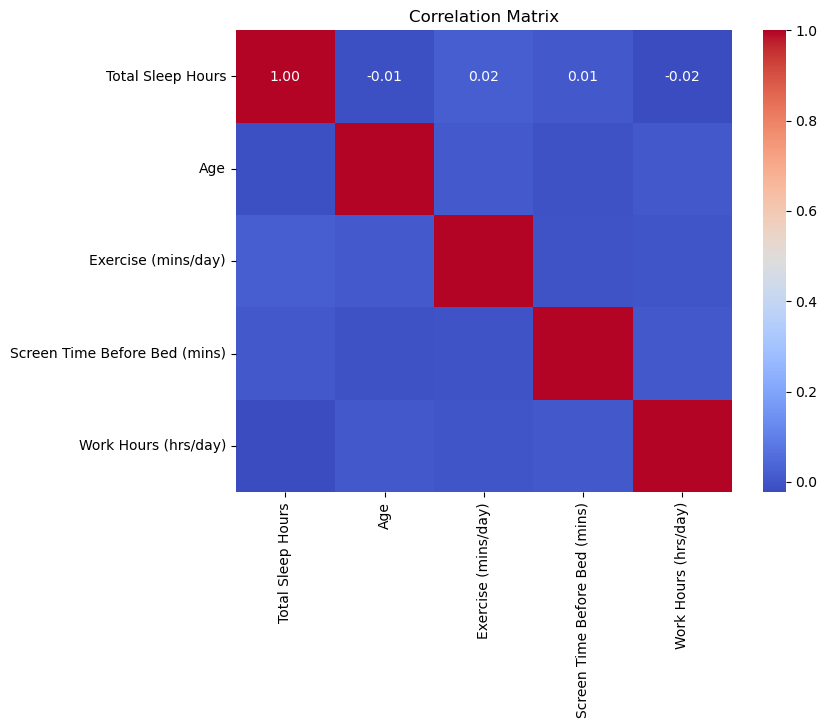

In [16]:
corr_matrix = numerical_columns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
## inghts >> the corrlation matrix shows very weak relation of total sleep hours and rest of the features